In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

In [2]:
data = pd.read_excel('4_2.xlsx')

In [3]:
def chi_sq(x, y, err):
    function = lambda x, a, b: a * x + b
    popt, pcov = curve_fit(function, xdata=x, ydata=y, sigma=err)

    sigma_a = np.sqrt(pcov[0, 0])
    sigma_b = np.sqrt(pcov[1, 1])

    return popt[0], popt[1], sigma_a, sigma_b

In [4]:
sns.set_theme()

In [5]:
data


,current,N,N_1,p,T,mkFermi,Unnamed: 6,фон,по 100 с,ток 0,Unnamed: 10
0,0.00,0.766,-0.040467,0.0,0.0,0.0000,NaN,NaN,NaN,Nф,dNф
1,0.20,0.950,0.143533,48.3,2.3,1152.3714,NaN,NaN,1.0,0.7398,0.086
2,0.40,0.950,0.143533,96.6,9.0,407.4248,NaN,NaN,2.0,0.8298,0.091
3,0.60,0.966,0.159533,144.9,20.1,233.8139,NaN,NaN,3.0,0.8498,0.092
4,0.80,0.966,0.159533,193.1,35.3,151.8592,NaN,NaN,NaN,0.806467,0.0896667
5,1.00,1.083,0.276533,241.4,54.2,141.7545,NaN,NaN,NaN,NaN,NaN
6,1.20,1.533,0.726533,289.7,76.4,173.5591,NaN,NaN,NaN,NaN,NaN
7,1.40,2.016,1.209533,338.0,101.7,177.4234,NaN,NaN,NaN,NaN,NaN
8,1.60,2.265,1.458533,386.3,129.6,159.4467,NaN,NaN,NaN,NaN,NaN
9,1.80,2.915,2.108533,434.6,159.8,160.5337,NaN,NaN,NaN,NaN,NaN


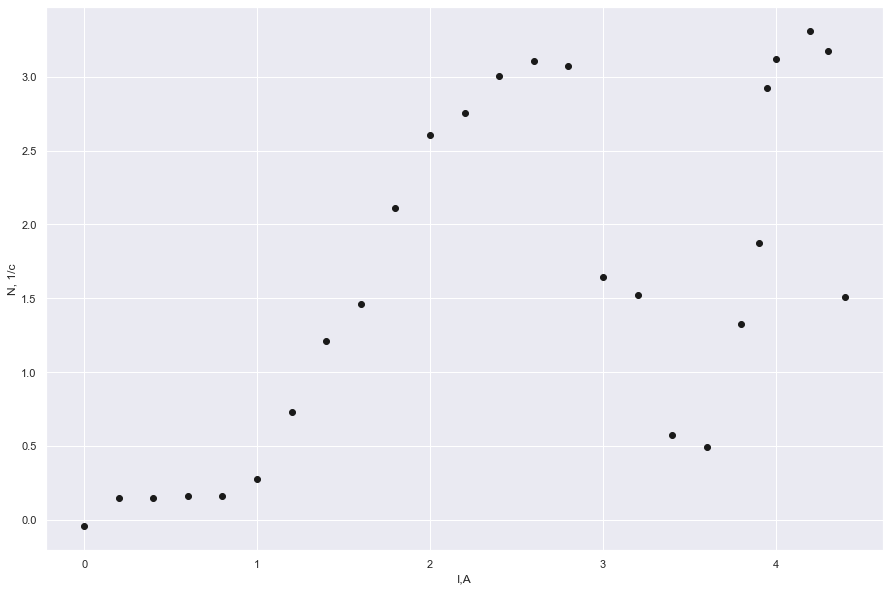

In [6]:
plt.rcParams["figure.figsize"] = (15,10)
cur = np.array(data['current'])
N = np.array(data['N_1'])
plt.xlabel('I,A')
plt.ylabel('N, 1/c')
plt.scatter(cur, N, color = 'k')

#x = np.linspace(1500, 3000, 500)
#a_,b_,s_,e_ = chi_sq(theta, lmbd, None)
#y = a_ * x + b_
#plt.plot(x, y, lw = 1)

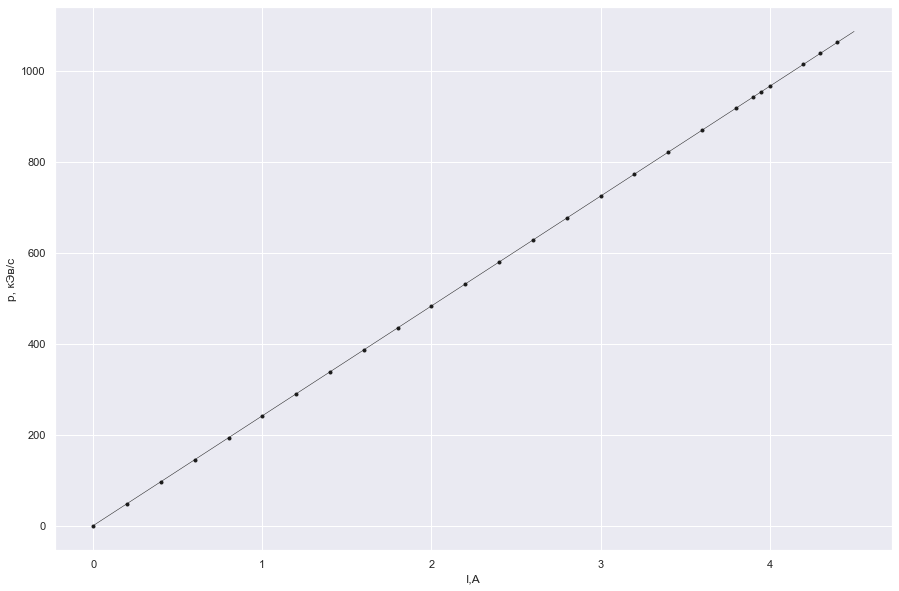

In [7]:
plt.rcParams["figure.figsize"] = (15,10)
cur = np.array(data['current'])
p = np.array(data['p'])
plt.xlabel('I,A')
plt.ylabel('p, кЭв/c')
plt.scatter(cur, p, marker = '.',color = 'k')

x = np.linspace(0,4.5,50)
a,b,s,e = chi_sq(cur,p, None)
y = a*x + b

plt.plot(x,y, lw = 0.5, color = 'k')

Коэф наклона и его погрешность 

In [8]:
a,s

(241.43347979052547, 0.004242585068538957)

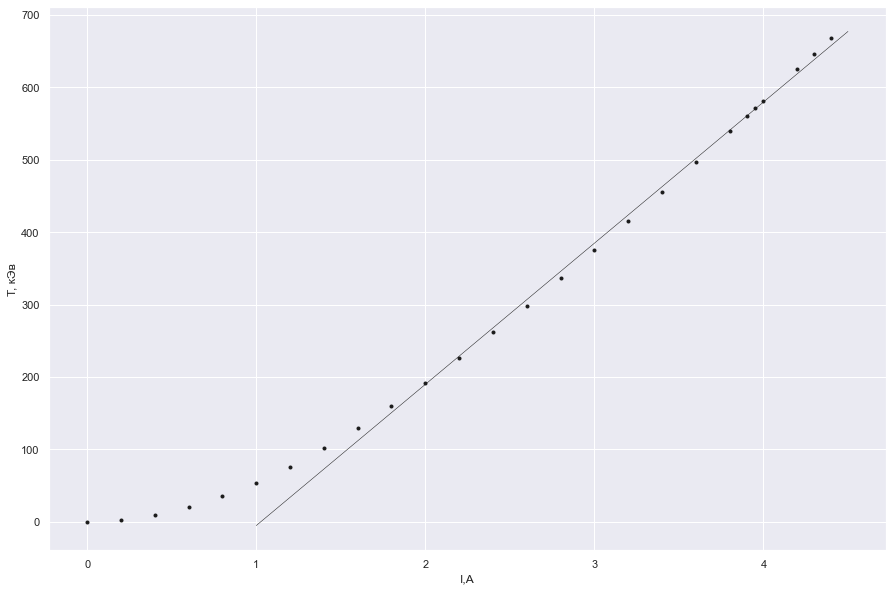

In [9]:
plt.rcParams["figure.figsize"] = (15,10)
cur = np.array(data['current'])
T = np.array(data['T'])
plt.xlabel('I,A')
plt.ylabel('T, кЭв')
plt.scatter(cur, T, marker = '.',color = 'k')

x = np.linspace(1,4.5,50)
a_1,b_1,s_1,e_1 = chi_sq(cur[8:26],T[8:26], None)
y = a_1*x + b_1

plt.plot(x,y, lw = 0.5, color = 'k')

Коэф наклона и погрешность

In [10]:
a_1,s_1

(194.9168223847299, 2.1473033060803197)

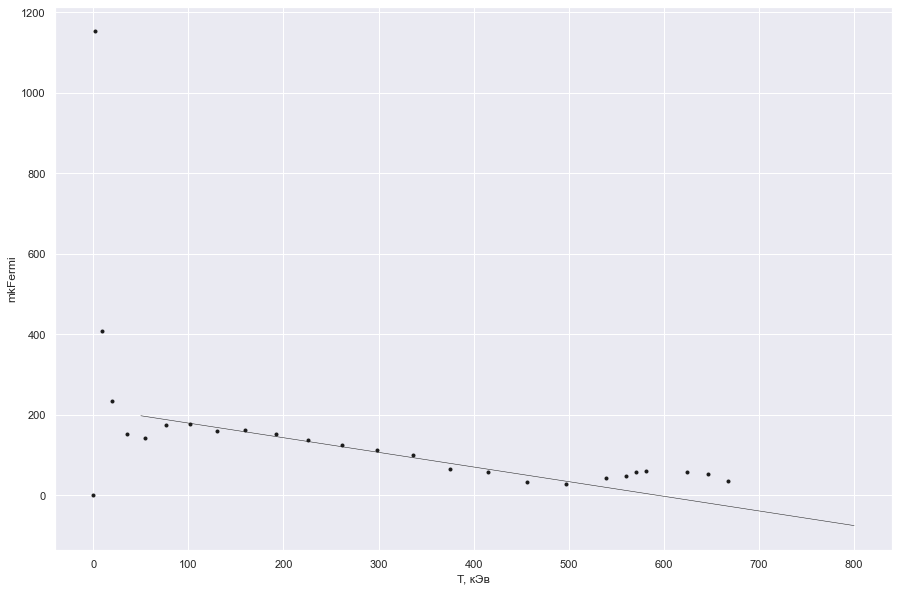

In [11]:
plt.rcParams["figure.figsize"] = (15,10)
fermi = np.array(data['mkFermi'])
T = np.array(data['T'])
plt.xlabel('T, кЭв')
plt.ylabel('mkFermi')
plt.scatter(T, fermi, marker = '.',color = 'k')

x = np.linspace(50,800,100)
a_2,b_2,s_2,e_2 = chi_sq(T[7:20],fermi[7:20], None)
y = a_2*x + b_2

plt.plot(x,y, lw = 0.5, color = 'k')

Tmax по пересечению с осью абсцисс

In [12]:
Tmax = -b_2/a_2
sigma = Tmax*np.sqrt((s_2/a_2)**2 + (e_2/b_2)**2)

In [13]:
Tmax, sigma

(591.5047708698767, 40.69492390283199)

In [14]:
a_2,s_2

(-0.364026404388881, 0.02177146944016284)